In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
img1 = cv2.imread('data/samuel_images_test/notSamuel/5.jpg')
img2 = cv2.imread('data/samuel_images_test/samuel/00000069.jpg')

In [3]:
img1.shape

(600, 400, 3)

In [4]:
def crop_image(img):
    w = img.shape[0]
    h = img.shape[1]
    diff = np.abs(w - h)

    height_start = 0
    height_end = h
    width_start = 0
    width_end = w

    crop_amount = diff / 2

    ## determine which is largest - width or height
    if w > h:
        # take half from each side
        width_start = crop_amount
        width_end = width_end - crop_amount
    else:
        height_start = crop_amount
        height_end = height_end - crop_amount

    crop_img = img[int(width_start):int(width_end), int(height_start):int(height_end)]
    return crop_img

In [5]:
crop_img1 = crop_image(img1)

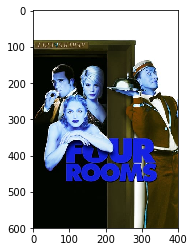

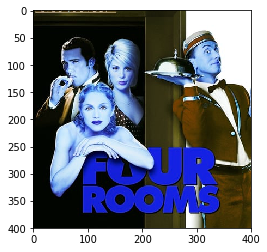

In [6]:
plt.imshow(img1)
plt.show()
plt.imshow(crop_img1)

In [7]:
crop_img2 = crop_image(img2)

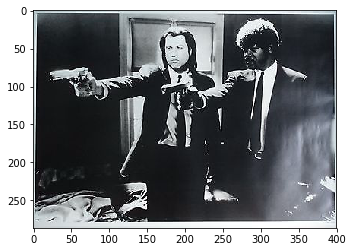

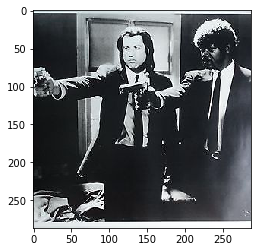

In [8]:
plt.imshow(img2)
plt.show()
plt.imshow(crop_img2)

# Loop through directory and crop all images

In [9]:
directories = [
    'samuel_images_validation',
    'samuel_images_train',
    'samuel_images_test',
]

sub_directories = [
    'notSamuel',
    'samuel'
]

In [10]:
for directory in directories:
    for subdirectory in sub_directories:
        read_path = os.path.join('data', directory, subdirectory)
        write_path = os.path.join('crop_images', directory, subdirectory)
        

        # check the directory we are about to read from to make sure it exists
        if not os.path.isdir(read_path):
            print('{} cannot be found'.format(read_path))
            continue
            
        # check if the directory we are going to write to exists create if it doesn't

        if not os.path.isdir(write_path):
            print('Creating {}'.format(write_path))
            os.makedirs(write_path)

        image_file_names = os.listdir(read_path)
        #print(image_file_names)
        for image_file_name in image_file_names:
            img_file_path = os.path.join(read_path, image_file_name)
            img = cv2.imread(img_file_path)
            try:
                crop_img = crop_image(img)
            except:
                print('error with {}'.format(img_file_path))
                continue
            cv2.imwrite(os.path.join(write_path, image_file_name), crop_img)

error with data/samuel_images_test/samuel/00000025.jpg
error with data/samuel_images_test/samuel/00000138.jpg
